In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
def sphere(x):
    d = len(x)
    y = 0
    for ii in range(d):
        y = y + x[ii]**2
    return y

In [108]:
def plot_convergence_curve(fig_name,title_str,fbest_h,fig_size_x = 8,fig_size_y = 4, dpi=1000):
    num_vals = len(fbest_h)
    t = np.linspace(0, num_vals-1, num_vals)
    fig, ax = plt.subplots(figsize=(fig_size_x,fig_size_y), dpi=dpi) # figura 800x600 pixels
    ax.plot(t, fbest_h,c='0.35')
    #ax.set_xlabel(r'$\mathit{iteration}$', fontsize=18)
    #ax.set_ylabel(r'$f_o$', fontsize=18)
    ax.set_xlabel(r'$\mathit{iteration}$')
    ax.set_ylabel(r'$f_o$')
    ax.set_title(title_str)
    ax.grid(True)
    plt.savefig(fig_name,format="eps",dpi=dpi)

In [109]:
def de(f_cost, pop_size, max_iters, pc, lb, ub, step_size=0.4, theta_0= None):
    n_dim= np.shape(lb)[0]
    pop_chrom= (ub-lb)*np.random.random_sample(size=(pop_size,n_dim))+lb
    
    if theta_0 is not None:
        pop_chrom[0]= theta_0
        
    pop_cost= np.zeros(pop_size)
    for id_p in range(pop_size):
        pop_cost[id_p] = f_cost(pop_chrom[id_p])
        
      
    for id_iter in range(max_iters):
        for id_pop in range (pop_size):
            x1 = pop_chrom[id_pop]
            ids_cs = np.linspace(0, pop_size -1, pop_size, dtype=int)
        
            ids_cs= np.where(ids_cs != id_pop)
            ids_cs= np.asarray(ids_cs)[0]
            
            xa,xb,xc= pop_chrom[np.random.choice(ids_cs,3,replace=False)]
            v1=xa
            v2= xb
            vb=xc
            vd=v1-v2
            vm= vb+step_size *vd
            vm= np.clip(vm,lb,ub)
            vt= np.zeros(n_dim)
            jr= np.random.rand()
        
            for id_dim in range(n_dim):
                rc = np.random.rand()
                if rc< pc or id_dim == jr:
                    vt[id_dim]=vm[id_dim]
                else:
                    vt[id_dim]=x1[id_dim]
                
            vt_cost = f_cost(vt)
        
            if vt_cost < pop_cost[id_pop]:
                pop_chrom[id_pop]= vt
                pop_cost[id_pop]= vt_cost
            
        ind_best= np.argmin(pop_cost)
        
        if id_iter ==0:
                minCost = [pop_cost[ind_best]]
                bestSol = [pop_chrom[ind_best]]
                #print("mincost,",minCost)
                #print("bestSoln,",bestSol)
        else:
                minCost= np.vstack((minCost,pop_cost[ind_best]))
                bestSol = np.vstack((bestSol,pop_chrom[ind_best]))
                #print("mincost,",minCost)
                #print("bestSoln,",bestSol)
        
    
    ind_best_cost= np.argmin(minCost)
    #print("ind_best_cost,",ind_best_cost)
    best_theta =bestSol[ind_best_cost]
    #print("best_thetasoln ",best_theta )
    best_scores = minCost
    #print("best_scores  ",best_scores  )
    return best_theta,best_scores
        
                            
    
    

In [115]:
np.random.seed(12)
n_dim=20
ubc=5
lbc= -5
lb= lbc * np.ones(n_dim)
ub = ubc*np.ones(n_dim)
max_iters=300
nMonteCarlorun = 20
pc = 0.9
theta_0= np.random.rand(n_dim, nMonteCarlorun)
pop_size= 20
f_cost= sphere
best_theta= np.zeros((n_dim, nMonteCarlorun))
best_scores= np.zeros((max_iters, nMonteCarlorun))
np.random.seed(12)

for id_run in range (nMonteCarlorun):
    [a,b]= de(f_cost,pop_size,max_iters,pc,lb,ub,step_size=0.8)
    best_theta[:, id_run]=a
    
    best_scores[:, id_run]= np.squeeze(b)



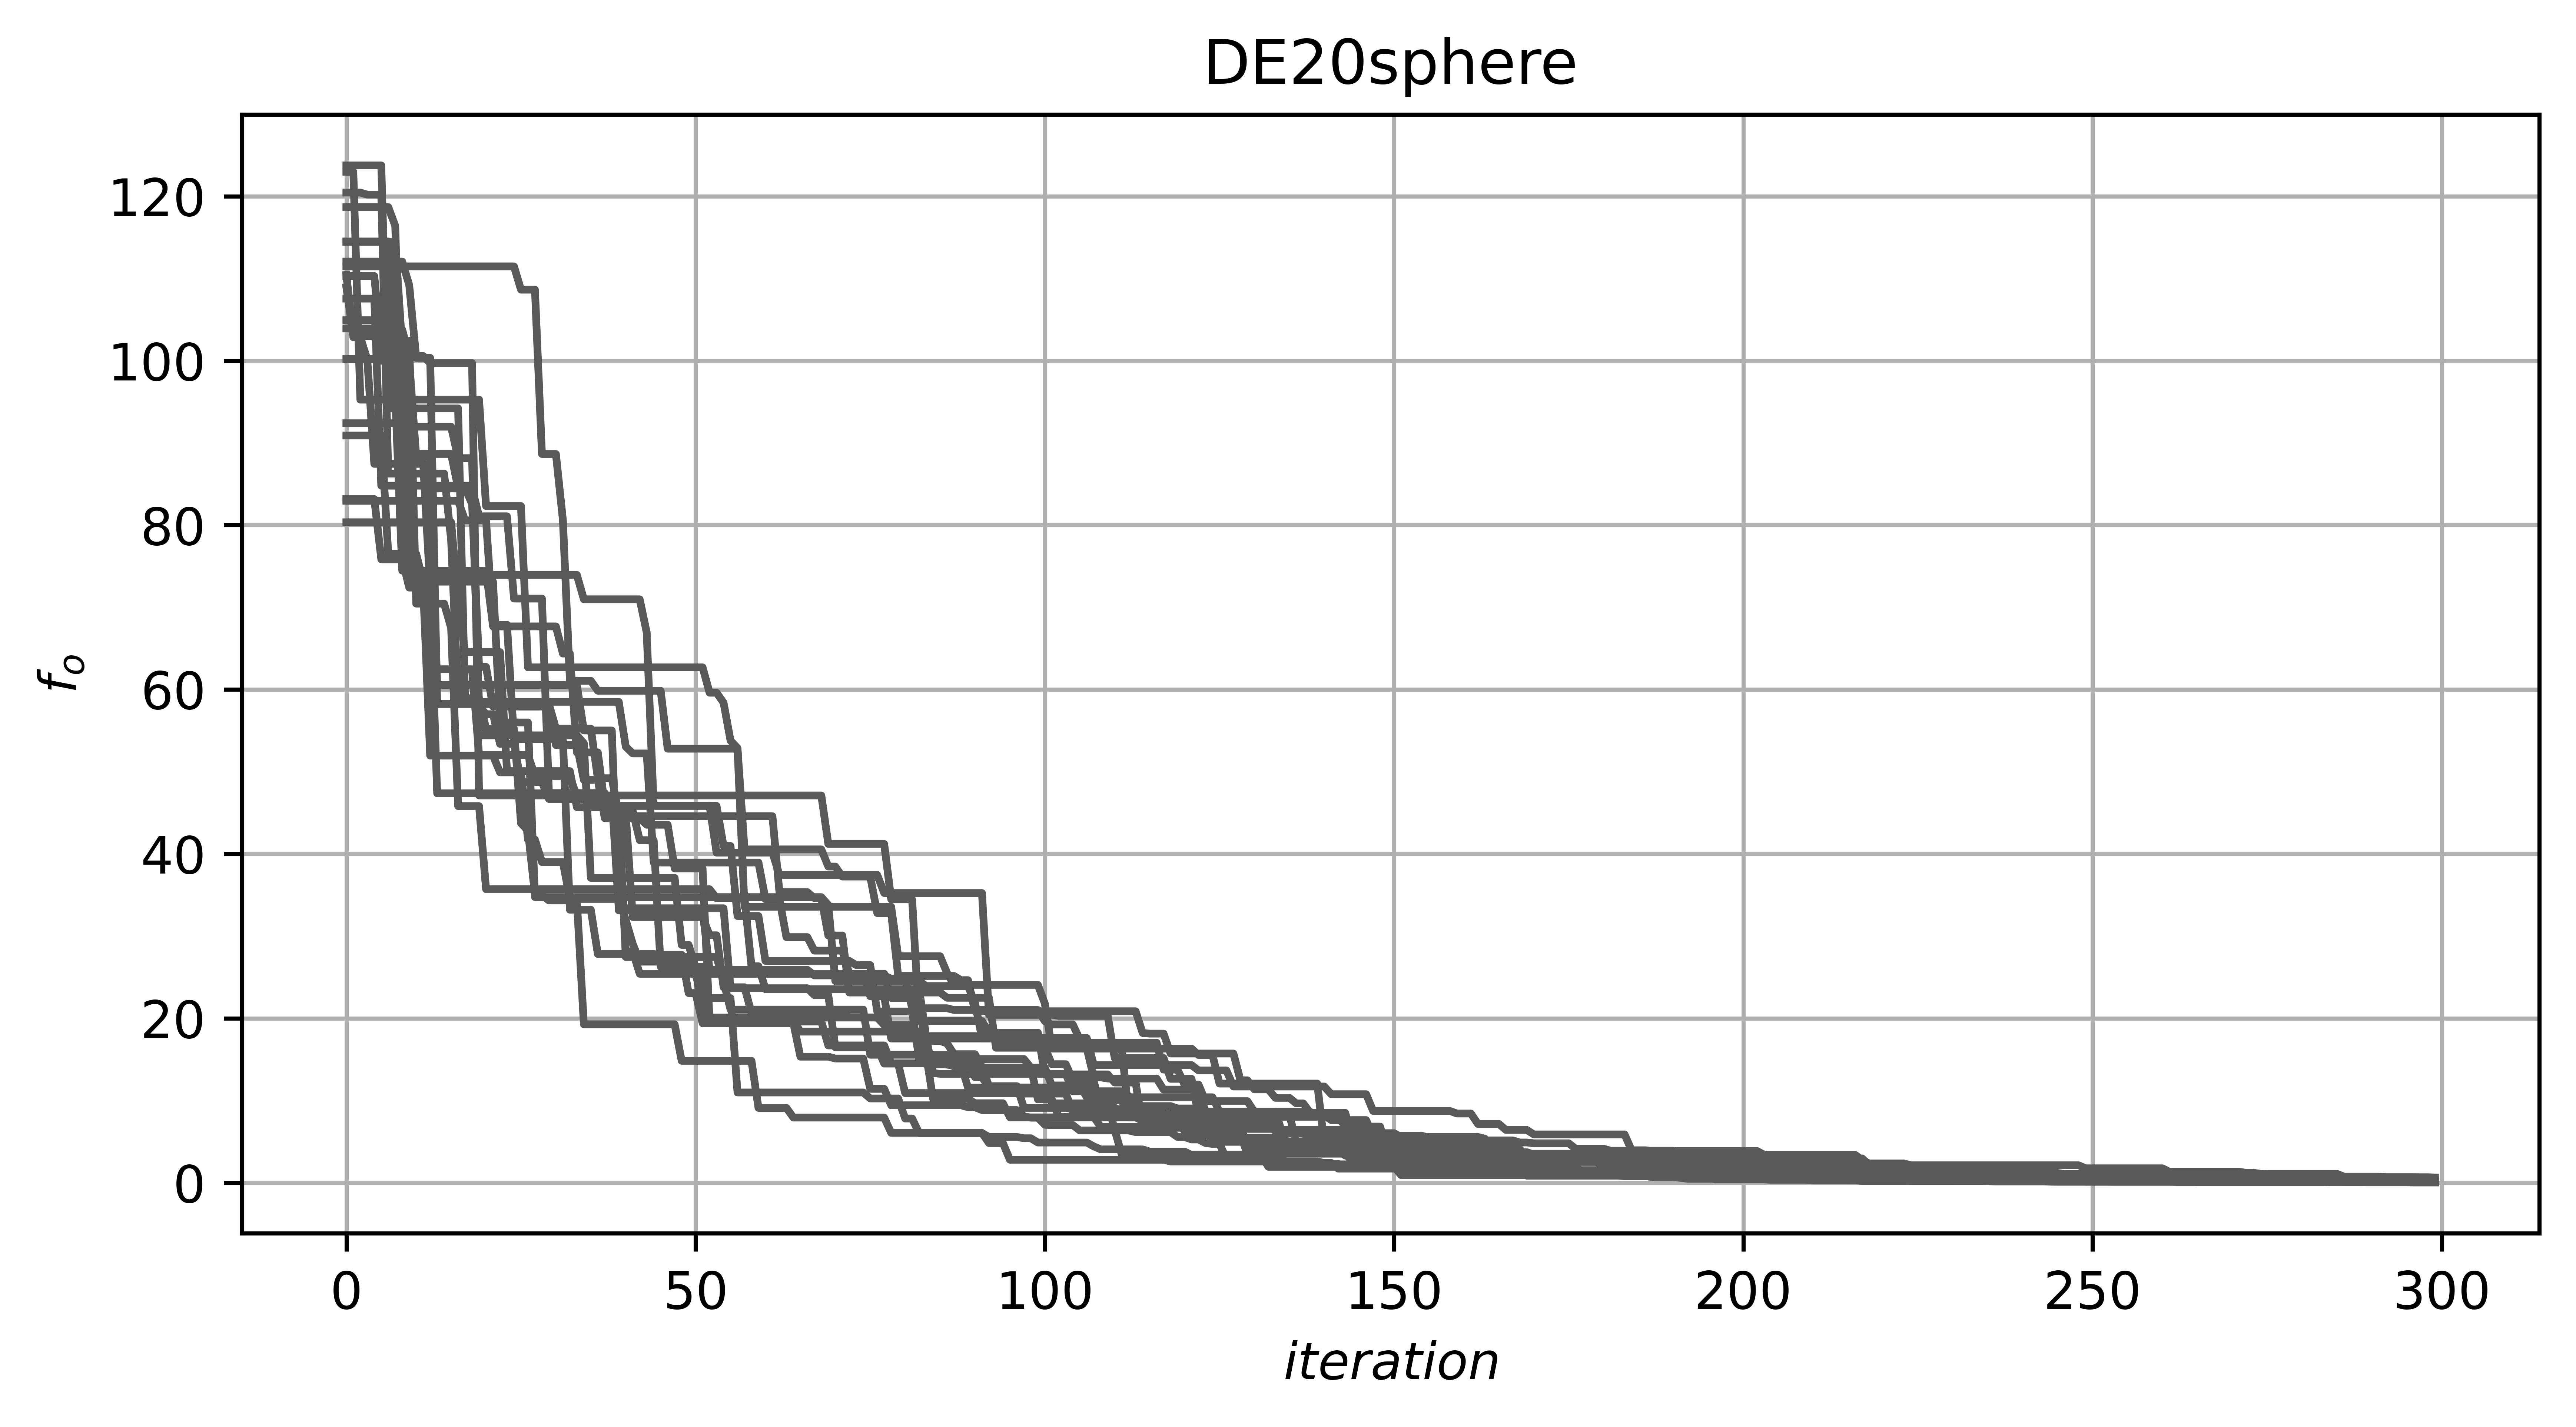

In [116]:
fig_file= "figde1.png"
title_str= "DE"+ str(n_dim)+"sphere"


plot_convergence_curve(fig_file,title_str,best_scores)